### Hotel Reviews Natural Language Processing to create insightful variables for modeling.

In this example data from Kaggle was used to create new variables in the aid of model creation for classification.  I found the API from Natural Language Tookit (NLTK) to be very useful for this exercise.

In [1]:
# Let's use Pandas to save the data as a DF #
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from matplotlib.colors import ListedColormap

hotel = pd.read_csv('Hotel_Reviews.csv') # This reads the csv file #
#Removing NA's
hotel = hotel.dropna()
hotel = hotel.reset_index(drop=True)

In [2]:
#Extract information from the Tags
# with help from https://www.kaggle.com/mbkinaci/detailed-eda-and-xgboost-89-accuracy

hotel['Leisure'] = hotel['Tags'].map(lambda x: 1 if ' Leisure trip ' in x else 0)
hotel['Business'] = hotel['Tags'].map(lambda x: 1 if ' Business trip ' in x else 0)
hotel['Trip_type'] = hotel['Leisure'] + hotel['Business']

#### This data set is going to require some Natural Language Processing or NLP.
##### According to Gartner NLP is defined as the ability to turn text or audio speech into encoded, structured information, based on an appropriate ontology.  In high level terms, we are going to gain some insight from the text data in our dataset through the use of our technology at hand. http://www.gartner.com/it-glossary/natural-language-processing-nlp/ 
##### To do this we are going to use some APIs to help us out.  NLTK, or Natural Language Toolkit.  Some of the blocks will take a couple of minutes to run.  They are noted in the comments if they take a couple of minutes to run.  If you don't have NLTK installed already please follow the directions at http://www.nltk.org/install.html and to get the data for stop words and other data assoicated with the API go to http://www.nltk.org/data.html

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import re, nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # stopwords are common words such as "a", "or", "and" ect
stop_words = set(stopwords.words('english')) #We will use english since reviews are in english
wordnet_lemmatizer = WordNetLemmatizer()

In [4]:
# NLP for Negative Reviews
# Code can take time to run
# Help from nltk.org
# Help from https://www.kaggle.com/mbkinaci/detailed-eda-and-xgboost-89-accuracy
negative_comment = []

for comment in hotel['Negative_Review']:
    only_letters = re.sub("[^a-zA-Z]", " ",comment)
    tokens = nltk.word_tokenize(only_letters) # A tokenizer divides a string into substrings
    lower_case = [l.lower() for l in tokens] # Lower case letters, trust me this makes presentation easier
    filtered_result = list(filter(lambda l: l not in stop_words, lower_case))
    lemmas = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result] # basically words mean what they are
    negative_comment.append(' '.join(lemmas))

In [5]:
#NLP for Positive Reviews
# Again can take a while to run
positive_comment = []

for comment in hotel['Positive_Review']:
    only_letters2 = re.sub("[^a-zA-Z]", " ",comment)
    tokens2 = nltk.word_tokenize(only_letters2)
    lower_case2 = [l.lower() for l in tokens2]
    filtered_result2 = list(filter(lambda l: l not in stop_words, lower_case2))
    lemmas2 = [wordnet_lemmatizer.lemmatize(t) for t in filtered_result2] 
    positive_comment.append(' '.join(lemmas2))

In [6]:
# Finding most important words in Negative Reviews
# Words that we have found value in
# This chunk takes a bit of time to run
cv = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_negative_words = cv.fit_transform(negative_comment)
temp1_counts = most_negative_words.sum(axis=0)
temp1_words = cv.vocabulary_

##### So we have some words that are coming up alot.  We are going to make some columns for them.

In [7]:
#room_small
room_small = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("room small" in negative_comment[i]) or ("small room" in negative_comment[i] or ("tiny room" in negative_comment[i])):
        room_small[i] = 1
np.sum(room_small)

22954.0

In [8]:
# Wi-Fi and include the word slow
wi_fi = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("wi fi" in negative_comment[i]) or ("wifi" in negative_comment[i]) or ("wi fi slow" in negative_comment[i]) or ("wifi slow" in negative_comment[i]) or ("slow internet" in negative_comment[i]):
        wi_fi[i] = 1
np.sum(wi_fi)

13883.0

In [9]:
#air-conditioner include hot in room
air_conditioning = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("air conditioning" in negative_comment[i]) or ("air conditioner" in negative_comment[i]) or ("hot room" in negative_comment[i]) : 
        air_conditioning[i] = 1
np.sum(air_conditioning)

6812.0

In [10]:
# Issues with rooms
# Dirty rooms, bathrooms, room service, mini bar
room_problem = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("mini bar" in negative_comment[i]) or ("room service" in negative_comment[i]) or ("double bed" in negative_comment[i]) or ("double room" in negative_comment[i] or ("dirty room" in negative_comment[i]) or ("stains" in negative_comment[i]) or ("dirty bathroom" in negative_comment[i])): 
        room_problem[i] = 1
np.sum(room_problem)

13893.0

In [11]:
# This chunk of code may take a couple of minutes
# We are going to look for the most important words in the positive reviews
cv2 = CountVectorizer(analyzer = "word",stop_words = 'english',max_features = 20,ngram_range=(2,2))
most_positive_words = cv2.fit_transform(positive_comment)
temp2_counts = most_positive_words.sum(axis=0)
temp2_words = cv2.vocabulary_

In [12]:
# Location should have a lot to do with ratings
#Location
location = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("good location" in positive_comment[i]) or ("great location" in positive_comment[i]) or ("location excellent" in positive_comment[i]) or ("location great" in positive_comment[i]) or ("location good" in positive_comment[i]) or ("walking distance" in positive_comment[i]) or ("excellent location" in positive_comment[i]): 
        location[i] = 1
np.sum(location)

90328.0

In [13]:
# Staff information
staff = np.zeros(len(hotel))
for i in range(len(hotel)):
    if ("friendly helpful" in positive_comment[i]) or ("friendly staff" in positive_comment[i]) or ("helpful staff" in positive_comment[i]) or ("staff helpful" in positive_comment[i]) or ("staff friendly" in positive_comment[i]): 
        staff[i] = 1
np.sum(staff)

87814.0

In [14]:
# Add the extracted columns to the data
hotel['room_small'] = room_small
hotel['air_conditioning'] = air_conditioning
hotel['room_problem'] = room_problem
hotel['location'] = location
hotel['staff'] = staff
hotel['wi_fi'] = wi_fi

In [15]:
# check to see if the variables were added
hotel.shape

(512470, 26)

##### Lets look at a plot of the Small Room.  We can see that smaller rooms cause a lower average score in the reviews.

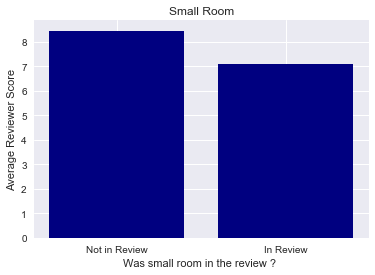

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sr_avg=hotel.groupby('room_small')['Reviewer_Score'].mean() # gets the average review
Index = [0,1] # What our values are
plt.bar(Index,sr_avg,color='Navy')
plt.xticks(Index,['Not in Review','In Review'],rotation=0)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was small room in the review ? ')
plt.title('Small Room')

##### From here we are going to plot the remaining four variables we created for Air Conditioning, Location, Room Problem and Staff. Air Conditioning or AC looks like a factor.  Room Problem looks like a factor as well.  Location is a surprise and does not look to be a factor.  Finally at the final bar chart it appears that staff is an important factor.

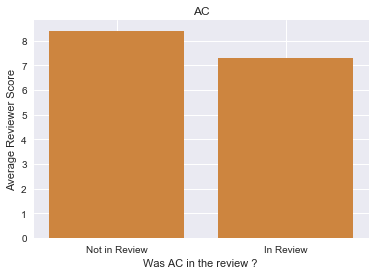

In [17]:
ac_avg=hotel.groupby('air_conditioning')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,ac_avg,color='peru')
plt.xticks(Index,['Not in Review','In Review'],rotation=0)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was AC in the review ? ')
plt.title('AC')

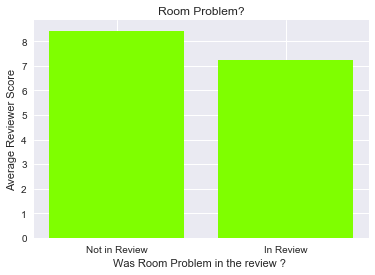

In [18]:
# Room Problem
rp_avg=hotel.groupby('room_problem')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,rp_avg,color='chartreuse')
plt.xticks(Index,['Not in Review','In Review'],rotation=0)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was Room Problem in the review ? ')
plt.title('Room Problem?')

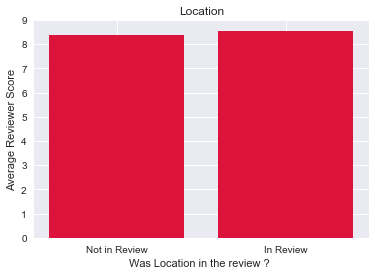

In [19]:
# Location
lc_avg=hotel.groupby('location')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,lc_avg,color='Crimson')
plt.xticks(Index,['Not in Review','In Review'],rotation=0)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Was Location in the review ? ')
plt.title('Location')

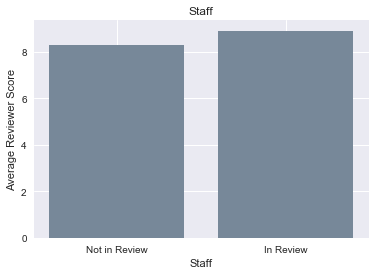

In [20]:
# Staff
sf_avg=hotel.groupby('staff')['Reviewer_Score'].mean()
Index = [0,1]
plt.bar(Index,sf_avg,color='lightslategrey')
plt.xticks(Index,['Not in Review','In Review'],rotation=0)
plt.ylabel('Average Reviewer Score')
plt.xlabel('Staff')
plt.title('Staff')